In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

## Data Preparation

In [2]:
data_current = pd.read_csv('breach_report_current.csv')

data_current['Breach Submission Date'] = pd.to_datetime(data_current['Breach Submission Date'])

data_current['Breach Submission Date Monthly'] = data_current['Breach Submission Date'].dt.to_period('M')
data_current['Breach Submission Date Monthly'] = data_current['Breach Submission Date Monthly'].astype(str)
data_current['Breach Submission Date Monthly'] = pd.to_datetime(data_current['Breach Submission Date Monthly']).dt.date.astype(str)


data_current['weekday_num'] = data_current['Breach Submission Date'].dt.dayofweek
data_current['Weekday'] = np.where(data_current['weekday_num']==0, 'Monday',
                                   np.where(data_current['weekday_num']==1, 'Tuesday',
                                           np.where(data_current['weekday_num']==2, 'Wednesday',
                                                   np.where(data_current['weekday_num']==3, 'Thursday',
                                                           np.where(data_current['weekday_num']==4, 'Friday',
                                                                   np.where(data_current['weekday_num']==5, 'Saturday', 'Sunday'))))))

data_current['Year'] = np.where(data_current['Breach Submission Date Monthly'].str.startswith('2023'), 2023,
                               np.where(data_current['Breach Submission Date Monthly'].str.startswith('2022'), 2022, 2021))

data_current.sort_values(by='Breach Submission Date', ignore_index=True, inplace=False)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach Submission Date Monthly,weekday_num,Weekday,Year
0,The Home for the Little Wanderers,MA,Healthcare Provider,5396,2021-02-26,Unauthorized Access/Disclosure,Email,No,NaN,2021-02-01,4,Friday,2021
1,"Gastroenterology Consultants, PA",TX,Healthcare Provider,161698,2021-03-19,Hacking/IT Incident,Network Server,No,NaN,2021-03-01,4,Friday,2021
2,LogicGate,IL,Business Associate,47035,2021-05-26,Hacking/IT Incident,Network Server,Yes,NaN,2021-05-01,2,Wednesday,2021
3,Buckeye Health Plan,OH,Health Plan,2334,2021-05-26,Hacking/IT Incident,Network Server,Yes,NaN,2021-05-01,2,Wednesday,2021
4,Sturdy Memorial Hospital,MA,Healthcare Provider,57379,2021-05-28,Hacking/IT Incident,Network Server,No,NaN,2021-05-01,4,Friday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Solutran,MN,Business Associate,17728,2023-05-12,Hacking/IT Incident,Network Server,Yes,NaN,2023-05-01,4,Friday,2023
861,Illinois Department of Healthcare and Family S...,IL,Health Plan,50839,2023-05-12,Hacking/IT Incident,Network Server,No,NaN,2023-05-01,4,Friday,2023
862,R&B Corporation of Virginia d/b/a Credit Contr...,VA,Business Associate,345523,2023-05-13,Hacking/IT Incident,Network Server,Yes,NaN,2023-05-01,5,Saturday,2023
863,Lehigh Valley Health Network,PA,Healthcare Provider,627,2023-05-15,Hacking/IT Incident,Network Server,No,NaN,2023-05-01,0,Monday,2023


## EDA

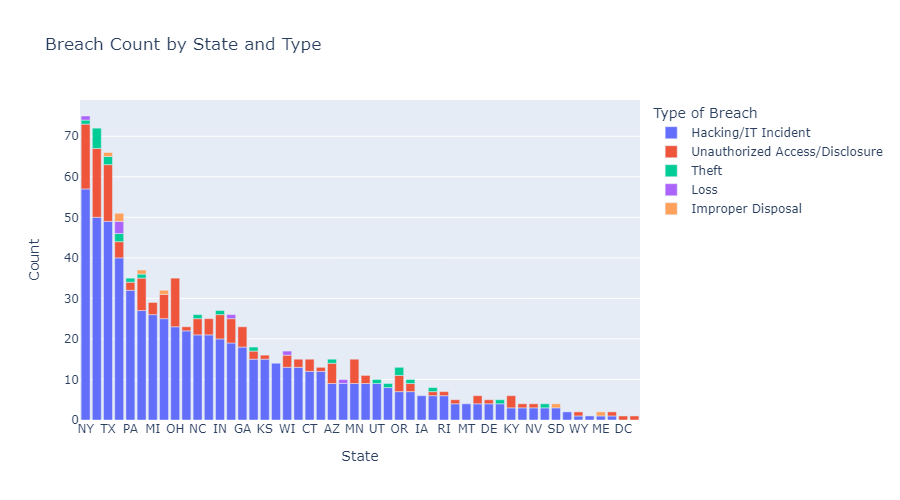

In [3]:
states_breach = data_current.groupby(['State', 'Type of Breach'])['State'].count().rename('Count').to_frame()
states_breach = states_breach.reset_index()
states_breach.sort_values(by='Count', ascending=False, inplace=True)

fig = px.bar(states_breach, x='State', y='Count', color='Type of Breach',
            title='Breach Count by State and Type', width=900)
fig.show(renderer='png')

**Top 5 states that have most reported breaches:**

1. New York,
2. California,
3. Texas,
4. Illinois,
5. Florida.

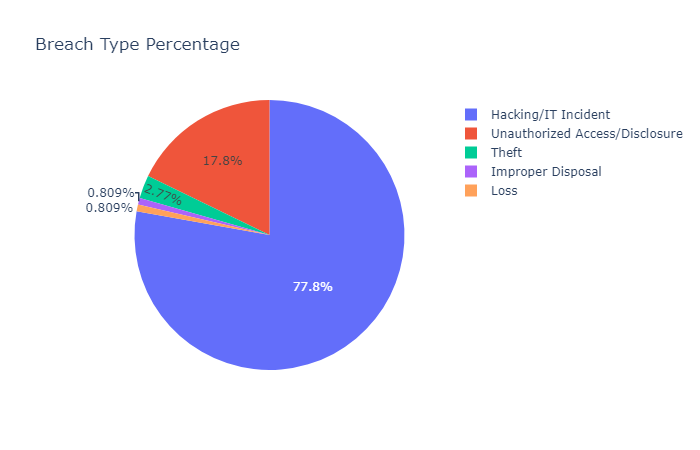

In [4]:
breachTypes = data_current['Type of Breach'].value_counts()

fig = px.pie(breachTypes,
            names=breachTypes.index,
            values=breachTypes.values,
            title='Breach Type Percentage')
fig.update_layout(width=700, height=450)
fig.show(renderer='png')

Most common breach is **"Hacking/IT Incident"**, the second popular is **"Unauthorized Access/Disclosure"** and the least common breach is **"Loss".**

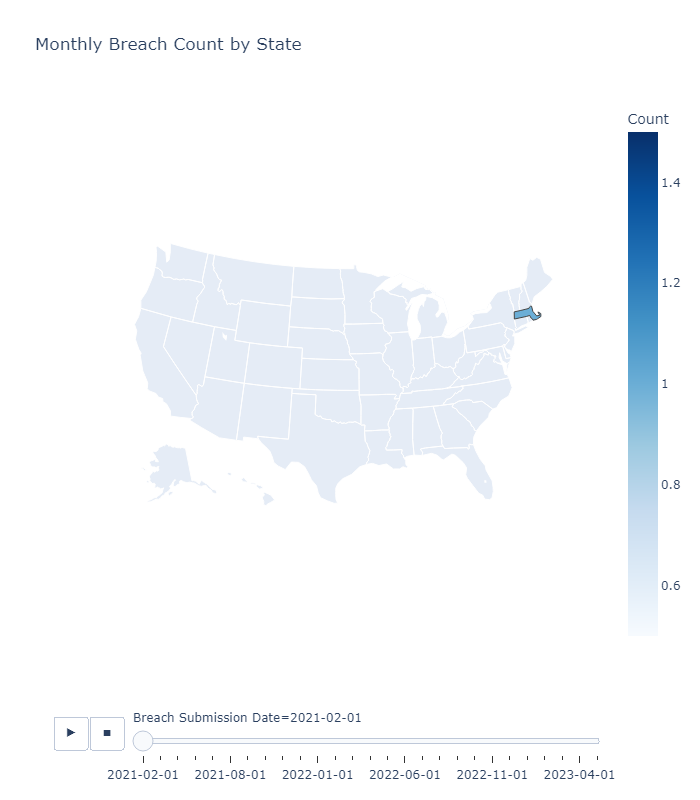

In [5]:
map_data = data_current.groupby(['State', 'Breach Submission Date'])['State'].count().rename('Count').to_frame()
map_data = map_data.reset_index()
map_data['Breach Submission Date'] = map_data['Breach Submission Date'].dt.to_period('M')
map_data['Breach Submission Date'] = map_data['Breach Submission Date'].astype(str)

map_data['Breach Submission Date'] = pd.to_datetime(map_data['Breach Submission Date']).dt.date.astype(str)
map_data = map_data.sort_values("Breach Submission Date")

fig = px.choropleth(map_data,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Count',
                    color_continuous_scale="blues",
                    animation_frame='Breach Submission Date',
                    title='Monthly Breach Count by State',
                   height=800)
fig.show(renderer='png')

Drag the circle below to right or left to get a specific date.

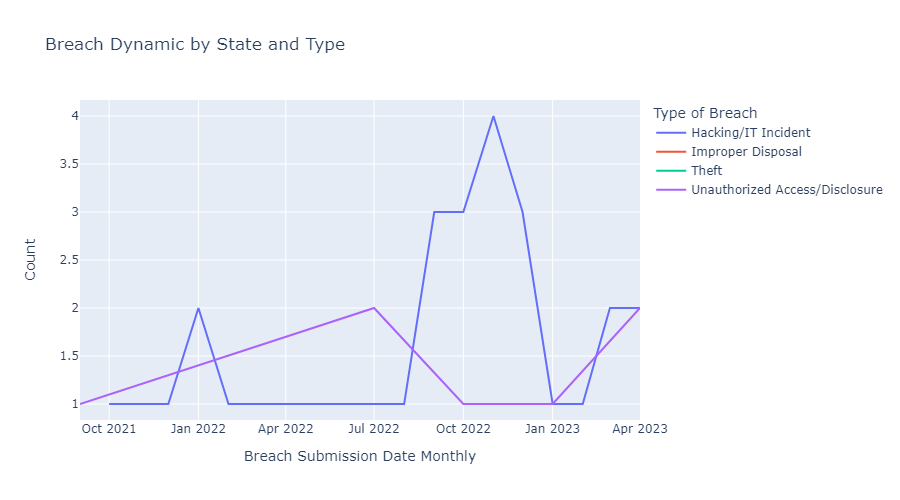

In [6]:
breaches = data_current.groupby(['State',  'Type of Breach', 'Breach Submission Date Monthly'])['Type of Breach'].count().rename('Count').to_frame()
breaches = breaches.reset_index()


fig = px.line(breaches[breaches['State'].isin(['FL'])],
              x="Breach Submission Date Monthly", y="Count",
              color='Type of Breach',
              title='Breach Dynamic by State and Type', width=900)
fig.show(renderer='png')

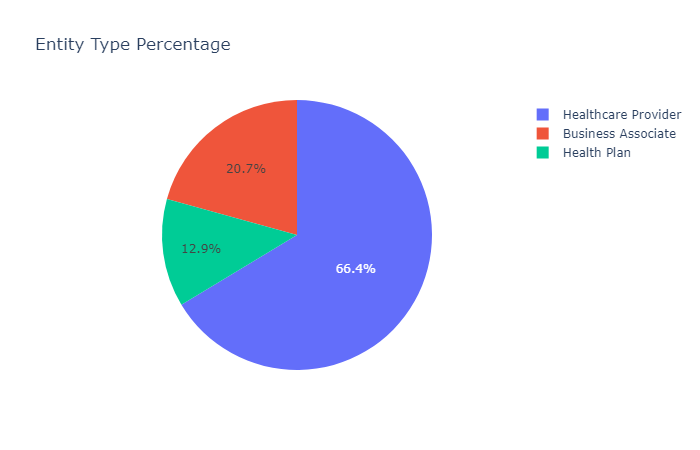

In [7]:
entityTypes = data_current['Covered Entity Type'].value_counts()

fig = px.pie(entityTypes,
            names=entityTypes.index,
            values=entityTypes.values,
            title='Entity Type Percentage')
fig.update_layout(width=700, height=450)
fig.show(renderer='png')

There are 3 types of covered entities in data and here are the proportions of each one:
1. Healthcare Provider - 66%,
2. Business Associate - 21%,
3. Health Plan - 13%.

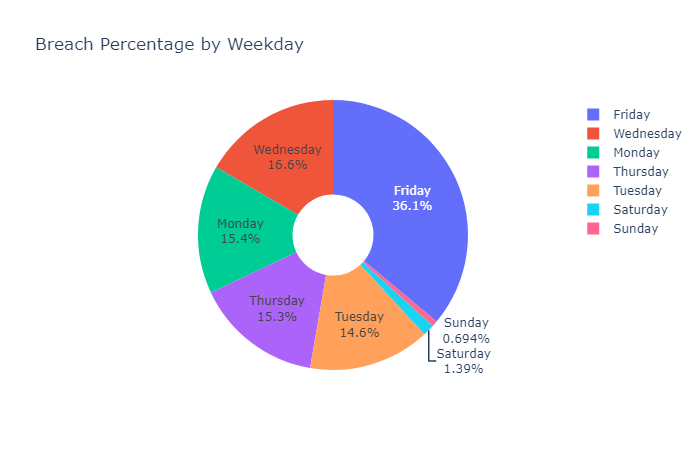

In [8]:
pop_weekdays = data_current['Weekday'].value_counts()

fig = go.Figure(data=[go.Pie(labels=pop_weekdays.index, values=pop_weekdays.values, hole=.3)])

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text="Breach Percentage by Weekday")
fig.update_layout(width=700, height=450)
fig.show(renderer='png')

* Highest amount of breaches are reported on Friday.
* Lowest amount of breaches are reported on Saturday and Sunday.

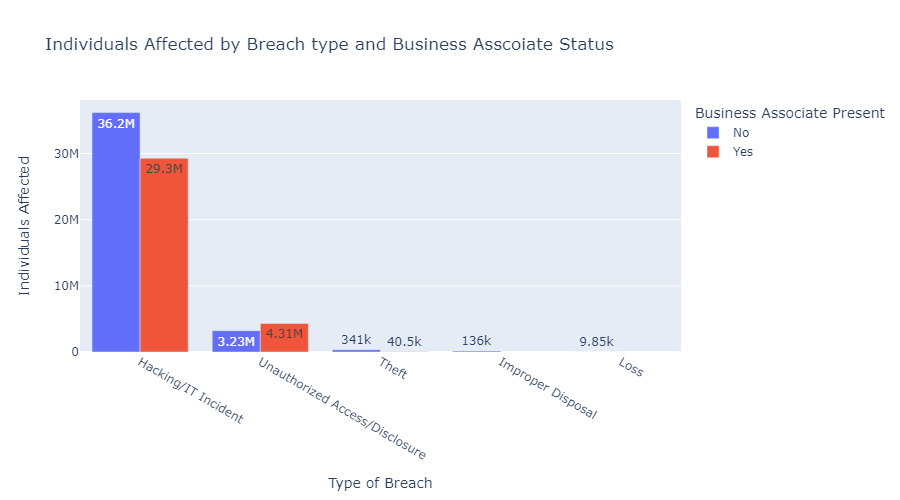

In [9]:
individuals_affected = data_current.groupby(['Type of Breach', 'Business Associate Present'])['Individuals Affected'].sum().to_frame()
individuals_affected = individuals_affected.reset_index()
individuals_affected.sort_values(by='Individuals Affected', ascending=False, inplace=True)

fig = px.bar(individuals_affected, x='Type of Breach', y='Individuals Affected', color='Business Associate Present',
             barmode='group', text_auto='.3s',
             title='Individuals Affected by Breach type and Business Asscoiate Status', width=900)
fig.show(renderer='png')

* 89% of individuals were affected by an "Hacking/IT Incident" type of breach and 45% of them were Business Associates.
* 10% of individuals were affected by an "Unauthorized Access/Disclosure" type of breach and 57% of them were Business Associates.
* Individuals were the least affected by the "Loss" type of breach.

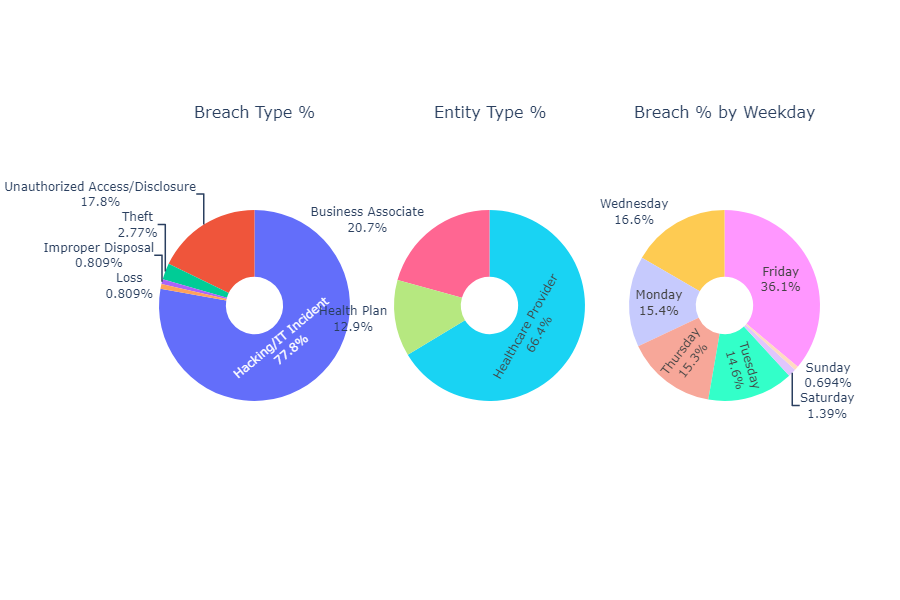

In [11]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                   subplot_titles=['Breach Type %', "Entity Type %", "Breach % by Weekday"])

breachTypes = data_current['Type of Breach'].value_counts()
entityTypes = data_current['Covered Entity Type'].value_counts()
pop_weekdays = data_current['Weekday'].value_counts()

fig.add_trace(go.Pie(
     values=breachTypes.values,
     labels=breachTypes.index,
    hole=.3,
     domain=dict(x=[0, 0.3])), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=entityTypes.values,
     labels=entityTypes.index,
    hole=.3,
     domain=dict(x=[0.3, 0.6])), 
     row=1, col=2)

fig.add_trace(go.Pie(
    values=pop_weekdays.values,
    labels=pop_weekdays.index,
    hole=.3,
     domain=dict(x=[0.6, 1])), 
     row=1, col=3)
fig.update(layout_showlegend=False)
fig.update_layout(width=900, height=600)
fig.update_traces(textinfo='percent+label')
fig.show(renderer='png')